<a href="https://colab.research.google.com/github/Ashwini-data-wizard/Text-Mining_University_Data/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import nltk
data = pd.read_csv("/content/textmining cleaned.csv", encoding='latin-1')

corpus = data['Generative AI statement text']


In [ ]:
import pandas as pd
data['Generative AI statement text'].dropna(inplace=True)
print(pd.isnull(corpus).sum())

0


In [ ]:
# tfidf representation

from sklearn.feature_extraction.text import TfidfVectorizer




#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

2344


In [ ]:
from sklearn.cluster import KMeans

K = 10
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(tfidf_model)

{1: 24, 3: 9, 9: 11, 0: 6, 8: 4, 5: 2, 4: 9, 2: 8, 6: 4, 7: 1}


In [ ]:
# print documents closest to each centroid
# sometimes we see a doc from another cluster j ends up in the list of the closest to centroid i
# this can happen when two clusters share some characteristics,
# e.g. cluster i is about hanging out with friend, cluster j is about entertainment, a doc about going to movie with friends may be close to both centroids

import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j] # transform all docs to cluster-distance space
    idx = np.argsort(d)[:n] # find n docs closest to centroid

    c_idx = [m for m, label in enumerate(model.labels_) if label==j]  # find the index of all docs in cluster j
    print('\n\n======cluster #', j, ', cluster size:', len(c_idx))
    for i in idx:
      if i not in c_idx:
        print('[ this doc is in a different cluster #', model.labels_[i], '>>', corpus[i])
      else:
        print(corpus[i])
  return

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0 , cluster size: 6
TEACHING RESPONSIBLE USE OF GENAI
AS GENAI TOOLS DEVELOP, IT WILL BE IMPORTANT FOR STUDENTS AND FACULTY TO CONTINUE TO BUILD THEIR RELATIONSHIPS WITH EACH OTHER AND WITH TECHNOLOGY. FACULTY ARE ENCOURAGED TO USE A PROACTIVE, HOLISTIC APPROACH IN USING GENAI THAT DISINCENTIVIZES CHEATING AND UNETHICAL USE OF GENAI BY EMPLOYING THE TEACH ACRONYM: BUILDING TRUST AND COMMUNITY WITH STUDENTS, INTERROGATING THE ETHICS OF GENAI, ENSURING EQUITABLE ACCESS TO GENAI, EXPLICITLY COMMUNICATING EXPECTATIONS AND RELEVANCE OF COURSE TASKS, AND (RE)DESIGNING ASSIGNMENTS TO CENTER THE HUMAN IN LEARNING BY TAPPING INTO STUDENT MOTIVATION, ITERATION, AGENCY, LIVED EXPERIENCE, AND CREATIVITY. 
TRUST
Students and faculty are encouraged to work together to determine how genAI will be used transparently in their coursework, and should learn from each other on how both students and instructors are using genAI in and out of the classroom.

ETHICS
GenAI tools are being de

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
# sometimes it does not work
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)

    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


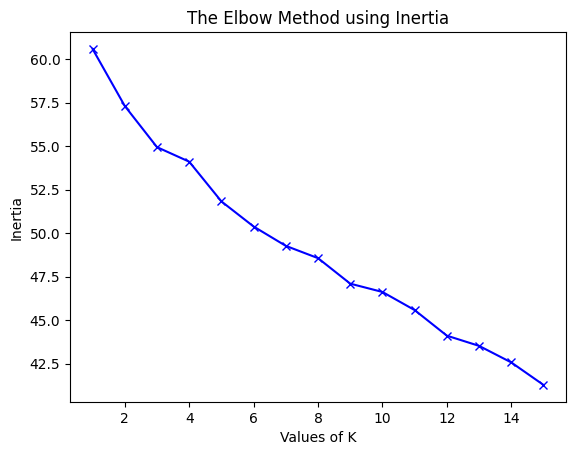

In [ ]:
elbow(15, tfidf)

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
print(data.index)
data.loc[69]

RangeIndex(start=0, stop=78, step=1)


Who is scraping?                                                           Vedant
Rank                                                                           82
University name                                   University of Illinois, Chicago
Wikidata ID                                                               Q955764
students total                                                 33,747 (fall 2022)
undergraduates                                                 21,807 (fall 2022)
postgraduates                                                  11,940 (fall 2022)
Carnegie                                                                       R1
coordinate location                                           41.871889,-87.64925
Location                                                                  Chicago
State                                                                          IL
info school name                                                              NaN
official website

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 10  # change number of cluster if applicable
sbert_model = KMeans(n_clusters=K, random_state=0)
sbert_model.fit(sbert_embeddings)
labels=sbert_model.labels_.tolist()  # Save cluster labels in a separate list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 10)



======cluster # 0 , cluster size: 6
The use of generative AI writing tools (such as ChatGPT, GrammarlyGO, GPT-3, GPT-4, Elicit, BERT, or others) to support you as a writer (e.g., for brainstorming, finding search terms for research, translating, getting feedback for revising and editing) is allowed in this class. Such use must be properly acknowledged in references, bibliographies, or other formats as required by the instructor and must be discussed in reflective writing (e.g., assignment memos).

Learning to use AI in productive, responsible, and ethical ways to support writing processes is an emerging literacy skill, one that we will begin to cultivate in this course through readings, guided activities, discussions, and assignments. We will review and practice as a class how to properly acknowledge use of AI writing tools and properly cite and reference AI generated content.

As we learn about AI and how AI writing tools can support different aspects of the writing process, we will